In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

1. Найти и интерпретировать корреляцию между переменными «Улица» и
«Гараж» (подсчитать корреляцию по Пирсону).

In [2]:
df = pd.DataFrame({'День': ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница',],
                   'Улица': [80, 98, 75, 91, 78],
                   'Гараж': [100, 82, 105, 89, 102],
                   })
df

,День,Улица,Гараж
0,Понедельник,80,100
1,Вторник,98,82
2,Среда,75,105
3,Четверг,91,89
4,Пятница,78,102


In [3]:
df.corr()[:1] #отрицательная корреляция

,Улица,Гараж
Улица,1.0,-1.0


In [ ]:
a_vector = np.array([80, 98, 75, 91, 78])
b_vector = np.array([100, 82, 105, 89, 102])
np.corrcoef(a_vector, b_vector)

array([[ 1., -1.],
       [-1.,  1.]])

2. Построить диаграмму рассеяния

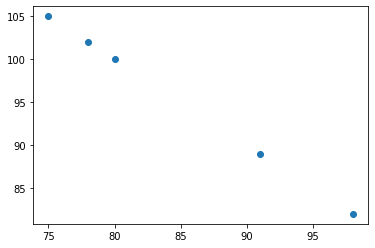

In [ ]:
plt.scatter(a_vector, b_vector)

3. Загрузить bitcoin.csv.

In [42]:
df_bitcoin = pd.read_csv('bitcoin.csv')
df_bitcoin

,Unnamed: 0,time,high,low,open,volumefrom,volumeto,close
0,0,2015-12-20,462.76,431.10,461.20,121531.64,5.431648e+07,441.78
1,1,2015-12-21,445.54,423.99,441.78,121990.88,5.327022e+07,437.59
2,2,2015-12-22,443.22,433.25,437.59,65785.54,2.884554e+07,437.03
3,3,2015-12-23,444.78,434.28,437.03,63247.04,2.787735e+07,442.43
4,4,2015-12-24,460.62,441.76,442.43,79604.01,3.609666e+07,452.98
...,...,...,...,...,...,...,...,...
1996,1996,2021-06-07,36790.39,33367.12,35798.57,52209.55,1.850311e+09,33582.86
1997,1997,2021-06-08,34061.09,31034.35,33582.86,88483.79,2.890313e+09,33409.38
1998,1998,2021-06-09,37528.42,32435.18,33409.38,92280.57,3.249554e+09,37391.58
1999,1999,2021-06-10,38387.20,35821.05,37391.58,63052.49,2.338112e+09,36680.78


In [43]:
try:
  df_bitcoin.drop('Unnamed: 0', axis=1, inplace=True)
  
except:
  pass
df_bitcoin

,time,high,low,open,volumefrom,volumeto,close
0,2015-12-20,462.76,431.10,461.20,121531.64,5.431648e+07,441.78
1,2015-12-21,445.54,423.99,441.78,121990.88,5.327022e+07,437.59
2,2015-12-22,443.22,433.25,437.59,65785.54,2.884554e+07,437.03
3,2015-12-23,444.78,434.28,437.03,63247.04,2.787735e+07,442.43
4,2015-12-24,460.62,441.76,442.43,79604.01,3.609666e+07,452.98
...,...,...,...,...,...,...,...
1996,2021-06-07,36790.39,33367.12,35798.57,52209.55,1.850311e+09,33582.86
1997,2021-06-08,34061.09,31034.35,33582.86,88483.79,2.890313e+09,33409.38
1998,2021-06-09,37528.42,32435.18,33409.38,92280.57,3.249554e+09,37391.58
1999,2021-06-10,38387.20,35821.05,37391.58,63052.49,2.338112e+09,36680.78


4. Убрать из данных для обучения модели последние 14 дней.

In [44]:
x_train, x_test = df_bitcoin[:-14].drop(['close', 'time'], axis=1), df_bitcoin[-14:].drop(['close', 'time'], axis=1)
y_train, y_test = df_bitcoin[:-14]['close'], df_bitcoin[-14:]['close']

In [10]:
df_bitcoin.drop('Unnamed: 0', axis=1, inplace=True)
df_bitcoin.drop('time', axis=1, inplace=True)
df_bitcoin

,high,low,open,volumefrom,volumeto,close
0,462.76,431.10,461.20,121531.64,5.431648e+07,441.78
1,445.54,423.99,441.78,121990.88,5.327022e+07,437.59
2,443.22,433.25,437.59,65785.54,2.884554e+07,437.03
3,444.78,434.28,437.03,63247.04,2.787735e+07,442.43
4,460.62,441.76,442.43,79604.01,3.609666e+07,452.98
...,...,...,...,...,...,...
1996,36790.39,33367.12,35798.57,52209.55,1.850311e+09,33582.86
1997,34061.09,31034.35,33582.86,88483.79,2.890313e+09,33409.38
1998,37528.42,32435.18,33409.38,92280.57,3.249554e+09,37391.58
1999,38387.20,35821.05,37391.58,63052.49,2.338112e+09,36680.78


In [11]:
df_train = df_bitcoin[:-14]
df_test = df_bitcoin[-14:]

In [36]:
df_train.iloc[:,:5]

,high,low,open,volumefrom,volumeto
0,462.76,431.10,461.20,121531.64,5.431648e+07
1,445.54,423.99,441.78,121990.88,5.327022e+07
2,443.22,433.25,437.59,65785.54,2.884554e+07
3,444.78,434.28,437.03,63247.04,2.787735e+07
4,460.62,441.76,442.43,79604.01,3.609666e+07
...,...,...,...,...,...
1982,39945.35,34467.32,34716.84,106765.14,3.981461e+09
1983,39842.90,36509.09,38837.76,66530.67,2.529569e+09
1984,40854.81,37855.81,38387.36,66483.59,2.607760e+09
1985,40408.95,37211.84,39295.08,46474.62,1.804037e+09


In [37]:
df_train['close']

0         441.78
1         437.59
2         437.03
3         442.43
4         452.98
          ...   
1982    38837.76
1983    38387.36
1984    39295.08
1985    38538.84
1986    35680.92
Name: close, Length: 1987, dtype: float64

In [13]:
df_test

,high,low,open,volumefrom,volumeto,close
1987,37307.10,33666.06,35680.92,60616.25,2.127790e+09,34611.58
1988,36481.62,33400.65,34611.58,37522.16,1.325408e+09,35662.59
1989,37512.80,34202.86,35662.59,50306.62,1.821663e+09,37290.83
1990,37910.19,35733.52,37290.83,44444.78,1.626269e+09,36683.51
1991,38225.18,35935.34,36683.51,39948.44,1.494571e+09,37576.98
1992,39482.46,37199.92,37576.98,41098.93,1.586641e+09,39229.66
1993,39273.49,35617.03,39229.66,49661.48,1.837944e+09,36861.50
1994,37911.76,34846.16,36861.50,39864.17,1.444089e+09,35538.40
1995,36453.81,35264.34,35538.40,27469.69,9.862751e+08,35798.57
1996,36790.39,33367.12,35798.57,52209.55,1.850311e+09,33582.86


5. Предсказать стоимость криптовалюты на следующие 14 дней с помощью
линейной регрессии.

In [45]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [46]:
y_pred = model.predict(x_test)
y_pred

array([35634.20339779, 35197.17021525, 36125.93120502, 36693.29946385,
       37338.78149877, 38774.11355116, 36802.7697797 , 36263.99560183,
       35966.50111068, 34937.04460276, 32400.41754341, 36179.09440381,
       37177.07205213, 36900.8381973 ])

6. С помощью коэффициента детерминации сравнить исходные данные 14-ти
последних дней, которые были обрезаны перед обучением модели, и 14
дней, которые предсказала модель.


In [47]:
model.score(x_test, y_test)

0.7574593145263838

7. Вывести угол наклона и y-перехват.

In [48]:
model.coef_

array([ 7.75754641e-01,  6.80277563e-01, -4.63750927e-01, -8.13452563e-04,
        1.63019822e-07])

In [49]:
model.intercept_

40.2783775552889

8. Построить диаграмму рассеяния (ось х – это close, ось y – это предсказанные
моделью close).

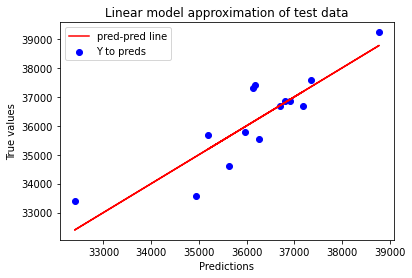

In [ ]:
plt.scatter(y_pred, y_test, c = 'b', label = 'Y to preds')
plt.plot(y_pred, y_pred, c = 'r', label = 'pred-pred line')
plt.xlabel("Predictions")
plt.ylabel("True values")
plt.title("Linear model approximation of test data")
plt.legend()
plt.show()

9. Загрузить housePrice.csv

In [58]:
df_housePrice = pd.read_csv('housePrice.csv')
df_housePrice

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3475,83,2,True,True,True,Niavaran,6.800000e+09,226666.67
3476,75,2,False,False,False,Parand,3.650000e+08,12166.67
3477,105,2,True,True,True,Dorous,5.600000e+09,186666.67


10. Произвести предобработку данных.

In [60]:
df_housePrice['Area'] = pd.to_numeric(df_housePrice['Area'], errors='coerce')

In [61]:
df_housePrice

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63.0,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60.0,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79.0,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95.0,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123.0,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3474,86.0,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3475,83.0,2,True,True,True,Niavaran,6.800000e+09,226666.67
3476,75.0,2,False,False,False,Parand,3.650000e+08,12166.67
3477,105.0,2,True,True,True,Dorous,5.600000e+09,186666.67


In [ ]:
df_housePrice['Area'].fillna(df_housePrice['Area'].median(),inplace=True)
df_housePrice.drop('Address', axis=1, inplace=True)
df_housePrice

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD)
0,63.0,1,True,True,True,1.850000e+09,61666.67
1,60.0,1,True,True,True,1.850000e+09,61666.67
2,79.0,2,True,True,True,5.500000e+08,18333.33
3,95.0,2,True,True,True,9.025000e+08,30083.33
4,123.0,2,True,True,True,7.000000e+09,233333.33
...,...,...,...,...,...,...,...
3474,86.0,2,True,True,True,3.500000e+09,116666.67
3475,83.0,2,True,True,True,6.800000e+09,226666.67
3476,75.0,2,False,False,False,3.650000e+08,12166.67
3477,105.0,2,True,True,True,5.600000e+09,186666.67


In [ ]:
df_housePrice[['Parking', 'Warehouse',	'Elevator']] = df_housePrice[['Parking', 'Warehouse',	'Elevator']].apply(lambda x: x*1)

In [ ]:
df_housePrice

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD)
0,63.0,1,1,1,1,1.850000e+09,61666.67
1,60.0,1,1,1,1,1.850000e+09,61666.67
2,79.0,2,1,1,1,5.500000e+08,18333.33
3,95.0,2,1,1,1,9.025000e+08,30083.33
4,123.0,2,1,1,1,7.000000e+09,233333.33
...,...,...,...,...,...,...,...
3474,86.0,2,1,1,1,3.500000e+09,116666.67
3475,83.0,2,1,1,1,6.800000e+09,226666.67
3476,75.0,2,0,0,0,3.650000e+08,12166.67
3477,105.0,2,1,1,1,5.600000e+09,186666.67


In [ ]:
df_housePrice.corr()[-2:-1]

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD)
Price,0.722223,0.567732,0.190086,0.109367,0.111446,1.0,1.0


11. Реализовать линейную регрессию вручную, без использования библиотеки.

https://habr.com/en/post/659415/


In [ ]:
#зададим начальные условия
f0 = np.array(df_housePrice['Area'])
f1 = np.array(df_housePrice['Room'])
f2 = np.array(df_housePrice['Parking'])
f3 = np.array(df_housePrice['Warehouse'])
f4 = np.array(df_housePrice['Elevator'])

y = np.array(df_housePrice['Price(USD)'])

X = np.array([f0, f1, f2, f3, f4]).T

#рассчитаем коэффициенты используя выведенную формулу
coef_matrix = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
print(f'Коэффициенты рассчитанные по формуле {coef_matrix}')


#проверим расчет используя библиотеку sklearn
model = LinearRegression().fit(X, y)
coef_sklearn = model.coef_.T
coef_sklearn[0] = model.intercept_
print(f'Коэффициенты рассчитанные с использованием библиотеки sklearn {coef_sklearn}')


Коэффициенты рассчитанные по формуле [  2525.24445138   5605.91150065 -14673.03369982 -89859.49076822
   6345.19848251]
Коэффициенты рассчитанные с использованием библиотеки sklearn [-235016.84263549   47342.99146283   -6395.61342277   35951.09908217
   33256.41450656]


In [ ]:
# Построение линейной регрессии
x=np.array(df_housePrice['Area'])
y=np.array(df_housePrice['Price'])

n = np.size(x)
m_x = np.mean(x) 
m_y = np.mean(y)
SS_xy = np.sum(y*x) - n*m_y*m_x
SS_xx = np.sum(x*x) - n*m_x*m_x
b_1 = SS_xy/SS_xx
b_0 = m_y - b_1*m_x


12. Вывести угол наклона и y-перехват.
13. Построить диаграмму.

In [ ]:
print(f'угол наклона = {b_0} , y-перехват = {b_1}')

угол наклона = -3650713399.3240194 , y-перехват = 84403804.1143536


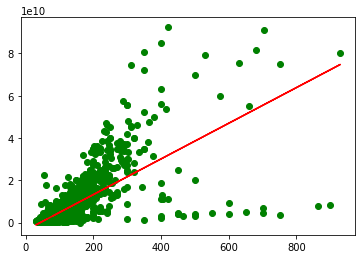

In [ ]:
plt.scatter(x, y, color='g')
plt.plot(x, b_0 + b_1*x, color='r')